# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

# Lendo dados 

In [2]:
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')
calendar = pd.read_csv('calendar.csv')

/home/luis/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20191122092441,2019-11-22,Very Nice 2Br - Copacabana - WiFi,Pls note that special rates apply for Carnival...,- large balcony which looks out on pedestrian ...,Pls note that special rates apply for Carnival...,none,This is the best spot in Rio. Everything happe...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.13
1,25026,https://www.airbnb.com/rooms/25026,20191122092441,2019-11-22,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,f,f,strict_14_with_grace_period,t,t,3,3,0,0,2.04
2,31560,https://www.airbnb.com/rooms/31560,20191122092441,2019-11-22,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.38
3,35636,https://www.airbnb.com/rooms/35636,20191122092441,2019-11-22,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,"The location is extremely convenient, safe and...",This cosy apartment is just a few steps away ...,none,The apartment street is very quiet and safe ....,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,2.28
4,35764,https://www.airbnb.com/rooms/35764,20191122092441,2019-11-22,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,"FEEL LIKE YOUR HOME LIVING AS ""CARIOCA"" LOCAL ...",Our newly renovated studio is located in the b...,none,Our guests will experience living with a local...,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,2.84


In [4]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,17878,64852,2010-07-15,135370,Tia,This apartment is in a perfect location -- two...
1,17878,76744,2010-08-11,10206,Mimi,we had a really great experience staying in Ma...
2,17878,91074,2010-09-06,80253,Jan,Staying in Max appartment is like living in a ...
3,17878,137528,2010-11-12,230449,Orene,In general very good and reasonable price.\r\n...
4,17878,147594,2010-12-01,219338,David,The apt was nice and in a great location only ...


In [5]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3042602,2019-11-22,t,"$1,679.00","$1,679.00",1.0,1125.0
1,3042602,2019-11-23,t,"$1,679.00","$1,679.00",1.0,1125.0
2,3042602,2019-11-24,t,"$1,679.00","$1,679.00",1.0,1125.0
3,3042602,2019-11-25,t,"$1,679.00","$1,679.00",1.0,1125.0
4,3042602,2019-11-26,t,"$1,679.00","$1,679.00",1.0,1125.0


# Limpeza de dados

Como o arquivo de listings tem muitas columas, vamos ver o que está em cada uma delas.

In [6]:
print(len(listings.columns))
print(list(listings.columns))

106
['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price

Algumas destas colunas parecem ser binárias. Vamos ver o que há nestes dados.

In [7]:
listings['is_location_exact'].unique()

array(['t', 'f'], dtype=object)

Os dados binários estão apresentados com 't' (True) e 'f' (False). Para melhor interpretá-los, é melhor que sejam variáveis binárias (1 e 0). Vamos então realizar esta conversão.

In [8]:
binary_cols = ['host_is_superhost', 'host_identity_verified', 'is_location_exact',
               'has_availability', 'requires_license', 'instant_bookable',
               'is_business_travel_ready', 'require_guest_profile_picture',
               'require_guest_phone_verification',  'host_has_profile_pic']

for col in binary_cols:
    listings[col] = listings[col].apply(lambda x: 1 if x == 't' else 0)

Na Coluna de avaliações por mês existem muitos valores nulos. Podemos interpretar que os valores nulos correspondem a zero.

In [9]:
listings['reviews_per_month'].fillna(0, inplace=True)

As variáveis de preço estão com um $ em todos os valores, devemos converter estes dados para pontos flutuantes (Float)

In [10]:
listings['price'] = listings['price'].replace('[\$,)]', '', regex=True).astype(float)
listings['extra_people'] = listings['extra_people'].replace('[\$,)]', '', regex=True).astype(float)
listings['cleaning_fee'] = listings['cleaning_fee'].replace('[\$,)]', '', regex=True).astype(float)

Como diversas colunas são dados textuais, estas teriam de receber um tratamento especial, possivelmente envolvendo processamento de linguagem natural (NLP), mas para manter nosso modelo simples, vamos descartar estas informações. Possíveis abordagens para extrair features relevantes destes campos seriam a utilização de palavras chaves, Word2Vec, mecanismos de análise de sentimentos, etc.

In [11]:
string_cols = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description',
               'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules',
               'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
               'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url',
               'host_neighbourhood', 'host_verifications', 'calendar_last_scraped', 'calendar_updated']
listings = listings.drop(string_cols, axis=1)

Se existem colunas constantes, podemos descartá-las

In [12]:
listings = listings.drop([x for x in listings.columns if listings[x].nunique() < 2], axis=1)

Como nossos dados foram recolhidos selecionando apenas a cidade do Rio de Janeiro, podemos descartar algumas informações relativas a localização.

In [13]:
drop_cols = ['city', 'state', 'zipcode', 'market', 'smart_location',
             'country_code', 'country', 'street', 'neighbourhood_cleansed']
listings = listings.drop(drop_cols, axis=1)

Quase sempre é bastante útil extrair features de datas, por exemplo para extrair dados de sasonalidade. No entanto, para manter nosso modelo simples, vamos descartar estes dados.

In [14]:
drop_cols = ['host_since', 'first_review', 'last_review']
listings = listings.drop(drop_cols, axis=1)

A variável 'host_response_rate' está como uma string. Ela pode ser convertida para um número para ser melhor interpretado por nossos modelos. Note que existem valores nulos nesta coluna, mas ainda não irei tratá-los.

In [15]:
host_response_rate = []
for p in listings['host_response_rate']:
    if type(p) == str:
        host_response_rate.append(float(p.replace('%', '')))
    else:
        host_response_rate.append(p)
listings['host_response_rate'] = host_response_rate

Algumas informações sobre os dados que ainda temos:

In [16]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33715 entries, 0 to 33714
Data columns (total 59 columns):
id                                              33715 non-null int64
host_response_time                              21481 non-null object
host_response_rate                              21481 non-null float64
host_is_superhost                               33715 non-null int64
host_listings_count                             33695 non-null float64
host_total_listings_count                       33695 non-null float64
host_has_profile_pic                            33715 non-null int64
host_identity_verified                          33715 non-null int64
neighbourhood                                   31757 non-null object
latitude                                        33715 non-null float64
longitude                                       33715 non-null float64
is_location_exact                               33715 non-null int64
property_type                                   337

Algumas colunas possuem muitos valores nulos, portanto serão descartadas.

'host_total_listings_count' está sendo descartado por significar o mesmo que 'host_listings_count'.

In [17]:
drop_cols = ['license', 'square_feet', 'host_response_time', 'security_deposit',
             'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
             'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
             'review_scores_value', 'host_total_listings_count', 'calculated_host_listings_count',
             'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
             'calculated_host_listings_count_shared_rooms', 'id']
listings = listings.drop(drop_cols, axis=1)

Como nossa ideia é prever a variável 'price', não podemos utilizar as variáveis 'weekly_price' e 'monthly_price'.

In [18]:
drop_cols = ['weekly_price', 'monthly_price']
listings = listings.drop(drop_cols, axis=1)

Notemos o que há dentro da variável 'amenities':

Idealmente, podemos criar uma variável categorica para cada uma das opções possíveis dentro de 'amenities'. No entanto, para simplificar o problema, vou selecionar algumas destas possibilidades que aparentemente teriam um maior impacto no preço.

In [19]:
some_amenities = ['Cable TV', 'Internet', 'Wifi', 'Air conditioning', 'Lockbox', 'Kitchen', 'Gym',
                  'Hot tub', 'Private entrance', 'Laptop friendly workspace', '24-hour check-in',
                  'Breakfast', 'parking', 'pets_allowed', 'event_suitable']

for amenitie in some_amenities:
    listings.loc[listings['amenities'].str.contains(amenitie), amenitie] = 1
    listings[amenitie].fillna(0, inplace=True)

listings = listings.drop('amenities', axis=1)

Agora, devemos tratar os valores nulos. Nota-se que devemos fazer alguns destes tratamentos visualizando apenas o conjunto de treinamento. Então, vou manter alguns valores nulos por hora.

In [20]:
listings['host_listings_count'].fillna(1, inplace=True) # Grande maioria é 1
listings['neighbourhood'].fillna('desconhecido', inplace=True) # nulos são considerados desconhecidos

In [21]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33715 entries, 0 to 33714
Data columns (total 54 columns):
host_response_rate                  21481 non-null float64
host_is_superhost                   33715 non-null int64
host_listings_count                 33715 non-null float64
host_has_profile_pic                33715 non-null int64
host_identity_verified              33715 non-null int64
neighbourhood                       33715 non-null object
latitude                            33715 non-null float64
longitude                           33715 non-null float64
is_location_exact                   33715 non-null int64
property_type                       33715 non-null object
room_type                           33715 non-null object
accommodates                        33715 non-null int64
bathrooms                           33661 non-null float64
bedrooms                            33673 non-null float64
beds                                33667 non-null float64
bed_type           

Várias variáveis são dados categoricos. Para melhor lidar com eles, vamos utilizar o pd.dummies

In [22]:
listings = pd.get_dummies(listings)

Dividindo nossos dados em Treinamento (60%), validação(20%) e teste(20%):

In [23]:
X = listings.drop('price', axis=1)
y = listings['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Existem valores nulos em 'bathrooms', 'bedrooms', 'beds' e 'cleaning_fee'. Vamos completá-los com os valores medianos (para evitar influencia de outliers) do conjunto de treinamento; e host_response_rate será preenchido com a média.

In [24]:
median_bathrooms = X_train['bathrooms'].median()
median_bedrooms = X_train['bedrooms'].median()
median_beds = X_train['beds'].median()
median_cleaning_fee = X_train['cleaning_fee'].median()
mean_host_response_rate = X_train['host_response_rate'].mean()

X_train['bathrooms'].fillna(median_bathrooms, inplace=True)
X_train['bedrooms'].fillna(median_bedrooms, inplace=True)
X_train['beds'].fillna(median_beds, inplace=True)
X_train['cleaning_fee'].fillna(median_cleaning_fee, inplace=True)
X_train['host_response_rate'].fillna(mean_host_response_rate, inplace=True)

X_val['bathrooms'].fillna(median_bathrooms, inplace=True)
X_val['bedrooms'].fillna(median_bedrooms, inplace=True)
X_val['beds'].fillna(median_beds, inplace=True)
X_val['cleaning_fee'].fillna(median_cleaning_fee, inplace=True)
X_val['host_response_rate'].fillna(mean_host_response_rate, inplace=True)

X_test['bathrooms'].fillna(median_bathrooms, inplace=True)
X_test['bedrooms'].fillna(median_bedrooms, inplace=True)
X_test['beds'].fillna(median_beds, inplace=True)
X_test['cleaning_fee'].fillna(median_cleaning_fee, inplace=True)
X_test['host_response_rate'].fillna(mean_host_response_rate, inplace=True)

/home/luis/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Idealmente, devemos analisar se existem altas correlações entre nossas variáveis. Atráves de um mapa de calor é possível ter uma noção destas correlações de forma visual.

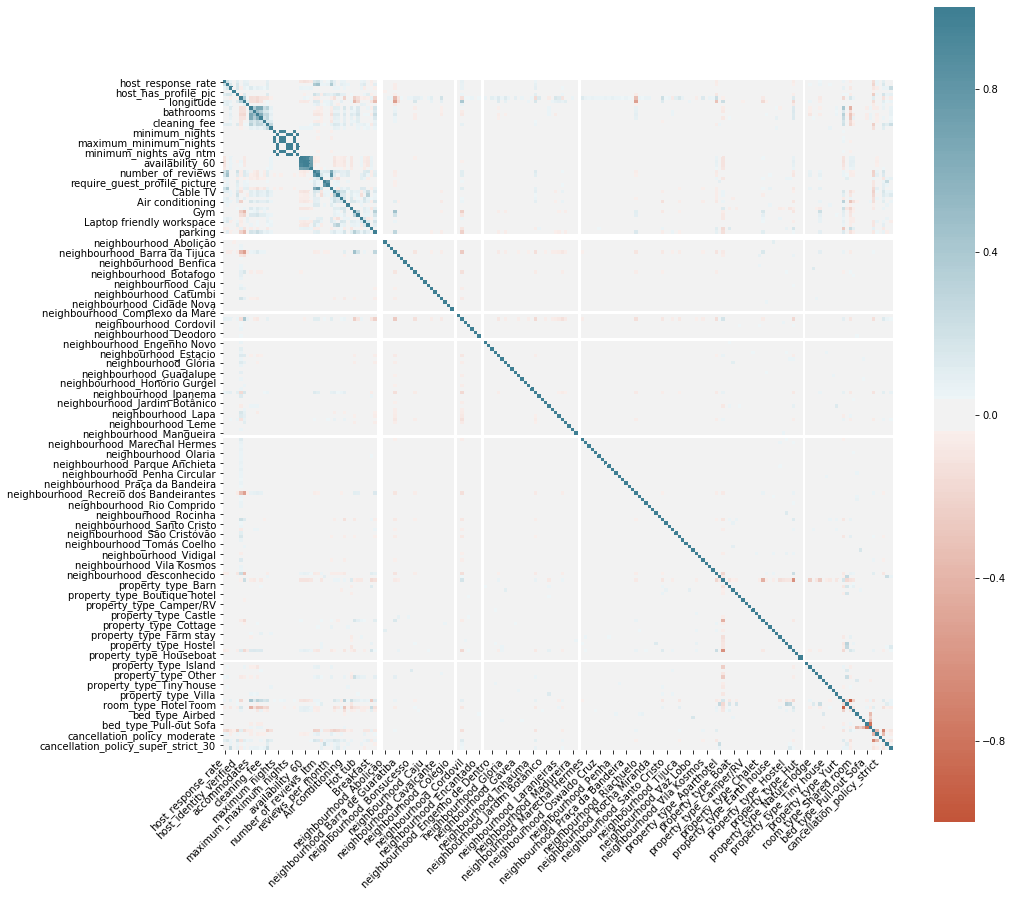

In [25]:
plt.figure(figsize=(15,15))

ax = sns.heatmap(X_train.corr(), vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

Existem algumas correlações altas e estas deveriam ser analisadas e, dependendo do caso, uma das variáveis altamente correlacionadas deveriam ser descartadas, mas vamos pular esta análise para simplificar o modelo.

Repare que existem muitas variáveis para nosso modelo. Será que estariamos sofrendo muito com a maldição da dimensionalidade?

In [26]:
n_features = len(X_train.columns)
n_features

200

Antes de fazer um primeiro modelo, vamos normalizar nossos dados.

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_val = pd.DataFrame(X_val, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

Vamos treinar um modelo simples e selecionar apenas as 50 features mais importantes para uma seleção simples de features.

In [29]:
import xgboost
from xgboost import XGBRegressor

In [30]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:50:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [31]:
train_preds = xgb.predict(X_train)
val_preds = xgb.predict(X_val)
test_preds = xgb.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
print("--> TRAIN METRICS")
print("mean_squared_error: ", mean_squared_error(y_train, train_preds))
print("mean_absolute_error: ", mean_absolute_error(y_train, train_preds))
print("r2_score: ", r2_score(y_train, train_preds))

print("\n--> VALIDATION METRICS")
print("mean_squared_error: ", mean_squared_error(y_val, val_preds))
print("mean_absolute_error: ", mean_absolute_error(y_val, val_preds))
print("r2_score: ", r2_score(y_val, val_preds))

print("\n--> TEST METRICS")
print("mean_squared_error: ", mean_squared_error(y_test, test_preds))
print("mean_absolute_error: ", mean_absolute_error(y_test, test_preds))
print("r2_score: ", r2_score(y_test, test_preds))

--> TRAIN METRICS
mean_squared_error:  1648644.0736582018
mean_absolute_error:  372.56428304956955
r2_score:  0.4131867030435572

--> VALIDATION METRICS
mean_squared_error:  2115965.0131293596
mean_absolute_error:  399.8169892271725
r2_score:  0.2554738872281268

--> TEST METRICS
mean_squared_error:  2231758.4668045226
mean_absolute_error:  400.73930365388145
r2_score:  0.2728898912030724


Selecionando apenas as 75 features mais importantes:

In [34]:
feature_weights = pd.DataFrame(xgb.feature_importances_, columns=['weight'], index=X_train.columns)
feature_weights.sort_values('weight', inplace=True)

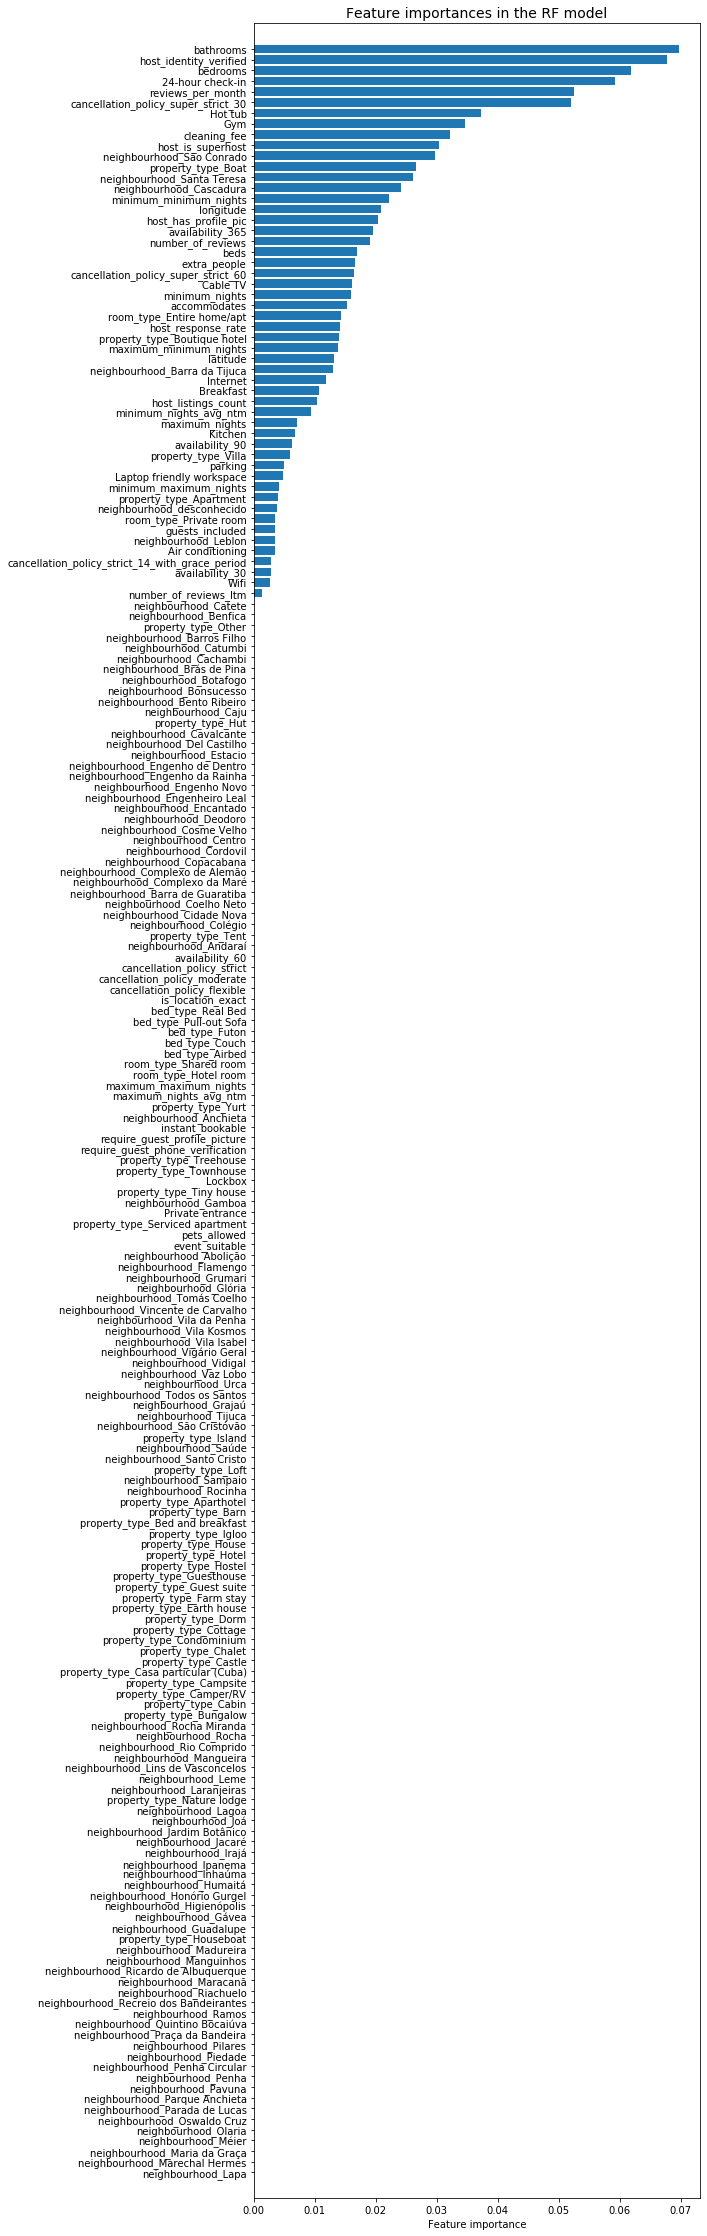

In [35]:
plt.figure(figsize=(8,40))
plt.barh(feature_weights.index, feature_weights.weight) 
plt.title("Feature importances in the RF model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [36]:
most_important_75 = feature_weights[-75:].index

X_train = X_train[most_important_75]
X_val = X_val[most_important_75]
X_test = X_test[most_important_75]

Devemos também encontrar bons hyperparâmetros para nosso modelo. Para tal, vou utilizar uma busca aleatória. Como métrica principal, utilizarei o r2_score.

In [37]:
from skopt import gp_minimize

In [38]:
def model_train(params):
    max_depth = params[0]
    learning_rate = params[1]
    min_child_weight = params[2]
    colsample_bytree = params[3]
    gamma = params[4]
    subsample = params[5]
    
    print(params, '\n')
    
    xgb = XGBRegressor(max_depth=max_depth, learning_rate=learning_rate,
                       min_child_weight=min_child_weight, colsample_bytree=colsample_bytree,
                       gamma=gamma, subsample=subsample, n_jobs=-1, random_state=42)
    xgb.fit(X_train, y_train)
    
    val_preds = xgb.predict(X_val)
    
    return -r2_score(y_val, val_preds)

search_grid = [(2, 10), (0.001, 0.1, 'log-uniform'), # max_depth, learning_rate
               (1, 10), (0.6, 1), # min_child_weigth, colsample_bytree
               (0.5, 5), (0.6, 1)] # gamma, subsample

result = gp_minimize(model_train, search_grid, random_state=42, verbose=1, n_calls=50, n_random_starts=25)

Iteration No: 1 started. Evaluating function at random point.
[8, 0.002327392228062872, 8, 0.8387400631785948, 2.5062473878411606, 0.6399899663272012] 

[23:50:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 1 ended. Evaluation done at random point.
Time taken: 10.8469
Function value obtained: 0.0093
Current minimum: 0.0093
Iteration No: 2 started. Evaluating function at random point.
[6, 0.004649617447336334, 2, 0.8603553891795412, 0.7538521056219512, 0.88879950890673] 

[23:50:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 2 ended. Evaluation done at random point.
Time taken: 6.8006
Function value obtained: -0.0731
Current minimum: -0.0731
Iteration No: 3 started. Evaluating function at random point.
[10, 0.001003592787878091, 10, 0.8469926038510867, 3.2524392221972644, 0.6028265220878869] 

[23:51:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 3 ended. Evaluation done at random point.
Time taken: 15.4898
Function value obtained: 0.0791
Current minimum: -0.0731
Iteration No: 4 started. Evaluating function at random point.
[2, 0.011208547084229371, 5, 0.6186662652854461, 4.881899834786568, 0.6931085361721216] 

[23:51:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 4 ended. Evaluation done at random point.
Time taken: 2.8373
Function value obtained: -0.1429
Current minimum: -0.1429
Iteration No: 5 started. Evaluating function at random point.
[3, 0.017249321573179006, 4, 0.9932923543227153, 2.60043301961591, 0.9439761626945283] 

[23:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 5 ended. Evaluation done at random point.
Time taken: 4.0774
Function value obtained: -0.2080
Current minimum: -0.2080
Iteration No: 6 started. Evaluating function at random point.
[7, 0.007961566078062952, 1, 0.9768807022739412, 3.034796980304927, 0.7541666010159664] 

[23:51:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 6 ended. Evaluation done at random point.
Time taken: 10.7851
Function value obtained: -0.1449
Current minimum: -0.2080
Iteration No: 7 started. Evaluating function at random point.
[2, 0.002895927274708839, 3, 0.8733054075301834, 3.2449849600217946, 0.9332779646944658] 

[23:51:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 7 ended. Evaluation done at random point.
Time taken: 2.8531
Function value obtained: 0.0167
Current minimum: -0.2080
Iteration No: 8 started. Evaluating function at random point.
[3, 0.006055098539300354, 3, 0.9021445641270611, 2.4132014352106017, 0.6831766651472755] 

[23:51:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 8 ended. Evaluation done at random point.
Time taken: 4.7508
Function value obtained: -0.0900
Current minimum: -0.2080
Iteration No: 9 started. Evaluating function at random point.
[7, 0.001155118620973099, 9, 0.7799016533479063, 2.2781760620081655, 0.9706635463175177] 

[23:51:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 9 ended. Evaluation done at random point.
Time taken: 7.3856
Function value obtained: 0.0725
Current minimum: -0.2080
Iteration No: 10 started. Evaluating function at random point.
[8, 0.004498643077694106, 6, 0.8083337040103296, 4.825274109572072, 0.9378135394712607] 

[23:51:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 10 ended. Evaluation done at random point.
Time taken: 9.2668
Function value obtained: -0.0740
Current minimum: -0.2080
Iteration No: 11 started. Evaluating function at random point.
[8, 0.01200561092619211, 6, 0.9861021229056552, 3.2316541145900817, 0.7103996728090174] 

[23:52:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 11 ended. Evaluation done at random point.
Time taken: 12.8506
Function value obtained: -0.2101
Current minimum: -0.2101
Iteration No: 12 started. Evaluating function at random point.
[4, 0.0021405919019849063, 1, 0.7693605922825479, 2.276966831790064, 0.7173952698872152] 

[23:52:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 12 ended. Evaluation done at random point.
Time taken: 5.0514
Function value obtained: 0.0279
Current minimum: -0.2101
Iteration No: 13 started. Evaluating function at random point.
[2, 0.002498531379402823, 7, 0.9160702162124823, 3.226819886514552, 0.9705203514053397] 

[23:52:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 13 ended. Evaluation done at random point.
Time taken: 2.7958
Function value obtained: 0.0306
Current minimum: -0.2101
Iteration No: 14 started. Evaluating function at random point.
[7, 0.06759574377750831, 9, 0.7797802696552814, 0.929345524206851, 0.7483273008793065] 

[23:52:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 14 ended. Evaluation done at random point.
Time taken: 7.7892
Function value obtained: -0.2701
Current minimum: -0.2701
Iteration No: 15 started. Evaluating function at random point.
[7, 0.02147062631022881, 6, 0.7098887171960256, 3.0255954163146557, 0.753170749901516] 

[23:52:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 15 ended. Evaluation done at random point.
Time taken: 7.8938
Function value obtained: -0.2535
Current minimum: -0.2701
Iteration No: 16 started. Evaluating function at random point.
[10, 0.049868654247546405, 7, 0.6943939678995823, 1.652307452425958, 0.6161734358153725] 

[23:52:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 16 ended. Evaluation done at random point.
Time taken: 11.5014
Function value obtained: -0.2668
Current minimum: -0.2701
Iteration No: 17 started. Evaluating function at random point.
[8, 0.0016664091501238183, 5, 0.6806876809341584, 4.530936180530838, 0.7901480892728447] 

[23:52:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 17 ended. Evaluation done at random point.
Time taken: 9.3991
Function value obtained: 0.0440
Current minimum: -0.2701
Iteration No: 18 started. Evaluating function at random point.
[7, 0.024605498767271753, 2, 0.8417669517111269, 2.9292849108575294, 0.6812244898939077] 

[23:53:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 18 ended. Evaluation done at random point.
Time taken: 9.8483
Function value obtained: -0.2515
Current minimum: -0.2701
Iteration No: 19 started. Evaluating function at random point.
[10, 0.015766341637993286, 7, 0.9521871356061031, 3.30959321660207, 0.7182534743350856] 

[23:53:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 19 ended. Evaluation done at random point.
Time taken: 15.5341
Function value obtained: -0.2415
Current minimum: -0.2701
Iteration No: 20 started. Evaluating function at random point.
[3, 0.008185951005222195, 3, 0.7666039791481465, 4.474761165134908, 0.7297380084021096] 

[23:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 20 ended. Evaluation done at random point.
Time taken: 4.1422
Function value obtained: -0.1303
Current minimum: -0.2701
Iteration No: 21 started. Searching for the next optimal point.
[2, 0.1, 10, 1.0, 0.5, 1.0] 

[23:53:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 3.2837
Function value obtained: -0.2545
Current minimum: -0.2701
Iteration No: 22 started. Searching for the next optimal point.
[10, 0.1, 1, 1.0, 0.5, 1.0] 

[23:53:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 13.3500
Function value obtained: -0.2017
Current minimum: -0.2701
Iteration No: 23 started. Searching for the next optimal point.
[8, 0.03735770506095302, 10, 1.0, 0.5, 1.0] 

[23:53:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 9.5220
Function value obtained: -0.2593
Current minimum: -0.2701
Iteration No: 24 started. Searching for the next optimal point.
[2, 0.1, 10, 0.6, 0.5, 0.6] 

[23:53:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 3.1925
Function value obtained: -0.2454
Current minimum: -0.2701
Iteration No: 25 started. Searching for the next optimal point.
[2, 0.05322760172489833, 1, 0.6, 5.0, 0.6] 

[23:53:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 3.1080
Function value obtained: -0.2266
Current minimum: -0.2701
Iteration No: 26 started. Searching for the next optimal point.
[10, 0.03196773586290048, 10, 0.7630987570624357, 0.5, 0.6] 

[23:54:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 13.8036
Function value obtained: -0.2775
Current minimum: -0.2775
Iteration No: 27 started. Searching for the next optimal point.
[8, 0.03993594946106028, 10, 0.7753422478995298, 5.0, 0.6] 

[23:54:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 10.9232
Function value obtained: -0.2785
Current minimum: -0.2785
Iteration No: 28 started. Searching for the next optimal point.
[10, 0.036534039142515316, 10, 0.6, 0.7061120124727445, 0.6452677983084604] 

[23:54:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 10.8957
Function value obtained: -0.2891
Current minimum: -0.2891
Iteration No: 29 started. Searching for the next optimal point.
[10, 0.022358206265567244, 10, 0.6189011186578055, 1.8038902445206169, 0.7489909055666941] 

[23:54:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 10.8221
Function value obtained: -0.2733
Current minimum: -0.2891
Iteration No: 30 started. Searching for the next optimal point.
[8, 0.04432577228427665, 10, 0.6046999731571485, 4.741036569221966, 0.7133286709464534] 

[23:54:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 8.5896
Function value obtained: -0.2862
Current minimum: -0.2891


In [39]:
max_depth, learning_rate, min_child_weight, colsample_bytree, gamma, subsample = result.x

In [40]:
xgb = XGBRegressor(max_depth=max_depth, learning_rate=learning_rate,
                       min_child_weight=min_child_weight, colsample_bytree=colsample_bytree,
                       gamma=gamma, subsample=subsample, n_jobs=-1, random_state=42)
xgb.fit(X_train, y_train)

[23:54:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.7061120124727445,
             importance_type='gain', learning_rate=0.036534039142515316,
             max_delta_step=0, max_depth=10, min_child_weight=10, missing=None,
             n_estimators=100, n_jobs=-1, nthread=None, objective='reg:linear',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.6452677983084604, verbosity=1)

In [41]:
train_preds = xgb.predict(X_train)
val_preds = xgb.predict(X_val)
test_preds = xgb.predict(X_test)

In [42]:
print("--> TRAIN METRICS")
print("mean_squared_error: ", mean_squared_error(y_train, train_preds))
print("mean_absolute_error: ", mean_absolute_error(y_train, train_preds))
print("r2_score: ", r2_score(y_train, train_preds))

print("\n--> VALIDATION METRICS")
print("mean_squared_error: ", mean_squared_error(y_val, val_preds))
print("mean_absolute_error: ", mean_absolute_error(y_val, val_preds))
print("r2_score: ", r2_score(y_val, val_preds))

print("\n--> TEST METRICS")
print("mean_squared_error: ", mean_squared_error(y_test, test_preds))
print("mean_absolute_error: ", mean_absolute_error(y_test, test_preds))
print("r2_score: ", r2_score(y_test, test_preds))

--> TRAIN METRICS
mean_squared_error:  1312568.8168023557
mean_absolute_error:  310.73236646602624
r2_score:  0.532808295509821

--> VALIDATION METRICS
mean_squared_error:  2020406.1490494076
mean_absolute_error:  373.3331313989963
r2_score:  0.28909734941813847

--> TEST METRICS
mean_squared_error:  2167160.67185114
mean_absolute_error:  373.64874898698605
r2_score:  0.2939359454312648
